## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных
Используем [набор данных падения метеоритов](https://www.kaggle.com/datasets/ulrikthygepedersen/meteorite-landings). 

In [2]:
data = pd.read_csv('meteorite.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(1199, 10)

In [4]:
# типы колонок
data.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

name            0
id              0
nametype        0
recclass       14
mass (g)       32
fall            0
year            1
reclat         15
reclong        15
GeoLocation    15
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1199


## Обработка пропусков в данных

### Простые стратегии - удаление или заполнение нулями
Удаление колонок, содержащих пустые значения res = data.dropna(axis=1, how='any')
  
Удаление строк, содержащих пустые значения res = data.dropna(axis=0, how='any')
  
**Удаление может производиться для группы строк или колонок.**

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1199, 10), (1199, 4))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1199, 10), (1137, 10))

In [10]:
data[data.isnull().any(axis=1)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
13,Akaba,426,Valid,NaN,779.0,Fell,1949.0,29.51667,35.05000,"(29.51667, 35.05)"
27,Alfianello,466,Valid,NaN,228000.0,Fell,1883.0,45.26667,10.15000,"(45.26667, 10.15)"
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.46667, -0.55)"
...,...,...,...,...,...,...,...,...,...,...
1043,Valdinoce,24146,Valid,Stone-uncl,NaN,Fell,1495.0,44.06667,12.10000,"(44.06667, 12.1)"
1054,Villarrica,24181,Valid,Stone-uncl,NaN,Fell,1925.0,-25.83333,-56.50000,"(-25.83333, -56.5)"
1079,Wuzhi,24342,Valid,Stone-uncl,NaN,Fell,1931.0,35.13333,113.33333,"(35.13333, 113.33333)"
1150,Adelaide,377,Valid,C2-ung,2031.0,Found,1972.0,NaN,NaN,NaN


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3[data.isnull().any(axis=1)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,0.0,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
13,Akaba,426,Valid,0,779.0,Fell,1949.0,29.51667,35.05000,"(29.51667, 35.05)"
27,Alfianello,466,Valid,0,228000.0,Fell,1883.0,45.26667,10.15000,"(45.26667, 10.15)"
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,0.0,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,0.0,Fell,1822.0,47.46667,-0.55000,"(47.46667, -0.55)"
...,...,...,...,...,...,...,...,...,...,...
1043,Valdinoce,24146,Valid,Stone-uncl,0.0,Fell,1495.0,44.06667,12.10000,"(44.06667, 12.1)"
1054,Villarrica,24181,Valid,Stone-uncl,0.0,Fell,1925.0,-25.83333,-56.50000,"(-25.83333, -56.5)"
1079,Wuzhi,24342,Valid,Stone-uncl,0.0,Fell,1931.0,35.13333,113.33333,"(35.13333, 113.33333)"
1150,Adelaide,377,Valid,C2-ung,2031.0,Found,1972.0,0.00000,0.00000,0


## "Внедрение значений" - импьютация (imputation)
### Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка mass (g). Тип данных float64. Количество пустых значений 32, 2.67%.
Колонка year. Тип данных float64. Количество пустых значений 1, 0.08%.
Колонка reclat. Тип данных float64. Количество пустых значений 15, 1.25%.
Колонка reclong. Тип данных float64. Количество пустых значений 15, 1.25%.


In [15]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,mass (g),year,reclat,reclong
0,21.00,1880.0,50.77500,6.08333
1,720.00,1951.0,56.18333,10.23333
2,107000.00,1952.0,54.21667,-113.00000
3,1914.00,1976.0,16.88333,-99.90000
4,780.00,1902.0,-33.16667,-64.95000
...,...,...,...,...
1194,11450.00,1955.0,20.70000,52.83333
1195,30.47,1998.0,37.86667,-117.40000
1196,28.00,2011.0,32.30600,-108.90380
1197,1200000.00,1973.0,20.60000,44.88333


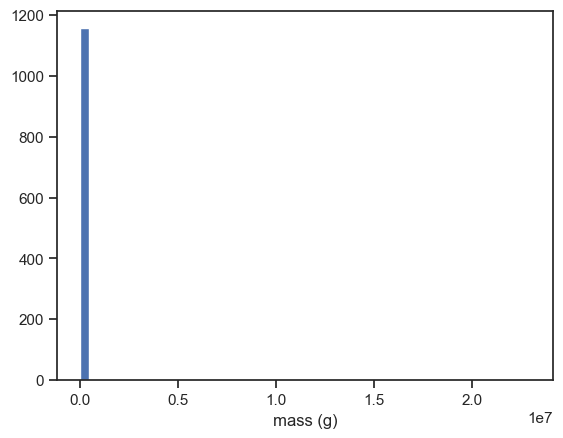

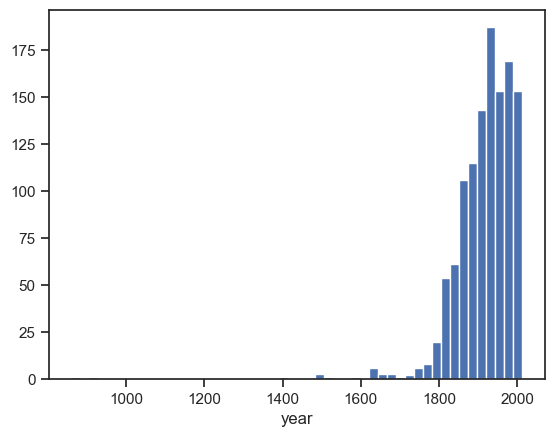

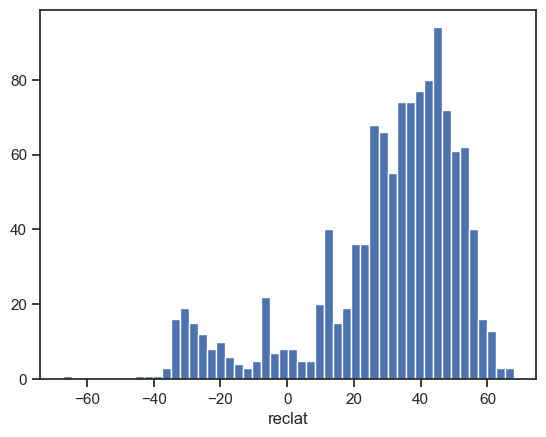

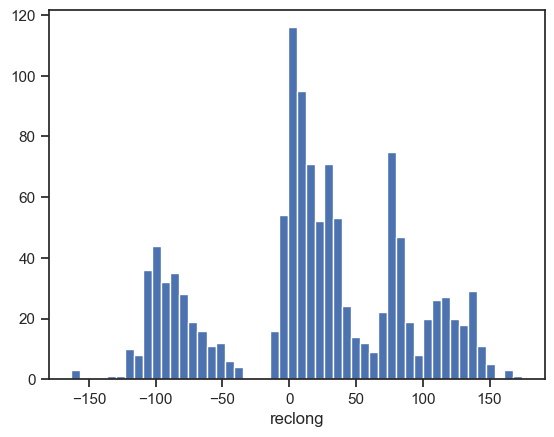

In [16]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [17]:
data_num_reclat = data_num[['reclat']]
data_num_reclat.head()

,reclat
0,50.77500
1,56.18333
2,54.21667
3,16.88333
4,-33.16667


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [19]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_reclat)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [20]:
strategies=['mean', 'median', 'most_frequent']

In [21]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_reclat)
    return data_num_imp[mask_missing_values_only]

In [22]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([29.88208154, 29.88208154, 29.88208154, 29.88208154, 29.88208154,
        29.88208154, 29.88208154, 29.88208154, 29.88208154, 29.88208154,
        29.88208154, 29.88208154, 29.88208154, 29.88208154, 29.88208154]))

In [23]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([35.541665, 35.541665, 35.541665, 35.541665, 35.541665, 35.541665,
        35.541665, 35.541665, 35.541665, 35.541665, 35.541665, 35.541665,
        35.541665, 35.541665, 35.541665]))

In [24]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([27.7, 27.7, 27.7, 27.7, 27.7, 27.7, 27.7, 27.7, 27.7, 27.7, 27.7,
        27.7, 27.7, 27.7, 27.7]))

In [25]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [26]:
data[['mass (g)']].describe()

,mass (g)
count,1.167000e+03
mean,4.851961e+04
std,6.947328e+05
min,1.000000e-01
25%,6.125000e+02
50%,2.500000e+03
75%,1.050000e+04
max,2.300000e+07


In [27]:
test_num_impute_col(data, 'mass (g)', strategies[0])

('mass (g)', 'mean', 32, 48519.61272493573, 48519.61272493573)

In [28]:
test_num_impute_col(data, 'mass (g)', strategies[1])

('mass (g)', 'median', 32, 2500.0, 2500.0)

In [29]:
test_num_impute_col(data, 'mass (g)', strategies[2])

('mass (g)', 'most_frequent', 32, 1000.0, 1000.0)

### Обработка пропусков в категориальных данных 

In [30]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка recclass. Тип данных object. Количество пустых значений 14, 1.17%.
Колонка GeoLocation. Тип данных object. Количество пустых значений 15, 1.25%.


In [31]:
cat_temp_data = data[['recclass']]
cat_temp_data.head()

,recclass
0,L5
1,H6
2,EH4
3,Acapulcoite
4,L6


In [32]:
cat_temp_data['recclass'].unique()

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', nan, 'H4', 'H', 'Iron, IVA', 'CR2-an',
       'LL5', 'CI1', 'L/LL4', 'Eucrite-mmict', 'CV3', 'Ureilite-an',
       'Stone-uncl', 'L3', 'Angrite', 'LL6', 'Aubrite', 'Iron, IIAB',
       'L4', 'Iron, IAB-sLL', 'Iron, ungrouped', 'CM2', 'OC',
       'Mesosiderite-A1', 'LL4', 'C2-ung', 'LL3.8', 'Howardite',
       'Eucrite-pmict', 'Diogenite', 'LL3.15', 'LL3.9', 'Iron, IAB-MG',
       'H/L3.9', 'Iron?', 'Eucrite', 'H4-an', 'L/LL6', 'Iron, IIIAB',
       'H/L4', 'H4-5', 'L3.7', 'LL3.4', 'Martian (chassignite)', 'EL6',
       'H3.8', 'H3-5', 'H5-6', 'Mesosiderite', 'H5-7', 'L3-6', 'H4-6',
       'Ureilite', 'Iron, IID', 'Mesosiderite-A3/4', 'CO3.3', 'H3',
       'EH3/4-an', 'Iron, IIE', 'L/LL5', 'H3.7', 'CBa', 'H4/5', 'H3/4',
       'H?', 'H3-6', 'L3.4', 'Iron, IAB-sHL', 'L3.7-6', 'EH7-an', 'Iron',
       'CR2', 'CO3.2', 'K3', 'L5/6', 'CK4', 'Iron, IIE-an', 'L3.6',
       'LL3.2', 'Pallasite'

In [33]:
cat_temp_data[cat_temp_data['recclass'].isnull()].shape

(14, 1)

In [34]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['L5'],
       ['H6'],
       ['EH4'],
       ...,
       ['L5'],
       ['Iron, IIAB'],
       ['H5']], dtype=object)

In [35]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Acapulcoite', 'Achondrite-ung', 'Angrite', 'Aubrite', 'C',
       'C2-ung', 'C3-ung', 'CBa', 'CI1', 'CK4', 'CM2', 'CO3.2', 'CO3.3',
       'CO3.4', 'CO3.5', 'CO3.6', 'CO3.7', 'CR2', 'CR2-an', 'CV3',
       'Diogenite', 'Diogenite-pm', 'EH3', 'EH3/4-an', 'EH4', 'EH5',
       'EH7-an', 'EL6', 'Eucrite', 'Eucrite-br', 'Eucrite-cm',
       'Eucrite-mmict', 'Eucrite-pmict', 'H', 'H/L3.6', 'H/L3.9', 'H/L4',
       'H3', 'H3-4', 'H3-5', 'H3-6', 'H3.4', 'H3.7', 'H3.8', 'H3.9/4',
       'H3/4', 'H4', 'H4-5', 'H4-6', 'H4-an', 'H4/5', 'H5', 'H5-6',
       'H5-7', 'H5/6', 'H6', 'H?', 'Howardite', 'Iron',
       'Iron, IAB complex', 'Iron, IAB-MG', 'Iron, IAB-sHL',
       'Iron, IAB-sLL', 'Iron, IAB-ung', 'Iron, IIAB', 'Iron, IID',
       'Iron, IIE', 'Iron, IIE-an', 'Iron, IIF', 'Iron, IIIAB',
       'Iron, IIIAB-an', 'Iron, IIIE-an', 'Iron, IVA', 'Iron, ungrouped',
       'Iron?', 'K3', 'L', 'L/LL4', 'L/LL5', 'L/LL6', 'L/LL6-an', 'L3',
       'L3-4', 'L3-6', 'L3.4', 'L3.6', 'L3.7', 'L3.7-

In [36]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['L5'],
       ['H6'],
       ['EH4'],
       ...,
       ['L5'],
       ['Iron, IIAB'],
       ['H5']], dtype=object)

In [37]:
np.unique(data_imp3)

array(['Acapulcoite', 'Achondrite-ung', 'Angrite', 'Aubrite', 'C',
       'C2-ung', 'C3-ung', 'CBa', 'CI1', 'CK4', 'CM2', 'CO3.2', 'CO3.3',
       'CO3.4', 'CO3.5', 'CO3.6', 'CO3.7', 'CR2', 'CR2-an', 'CV3',
       'Diogenite', 'Diogenite-pm', 'EH3', 'EH3/4-an', 'EH4', 'EH5',
       'EH7-an', 'EL6', 'Eucrite', 'Eucrite-br', 'Eucrite-cm',
       'Eucrite-mmict', 'Eucrite-pmict', 'H', 'H/L3.6', 'H/L3.9', 'H/L4',
       'H3', 'H3-4', 'H3-5', 'H3-6', 'H3.4', 'H3.7', 'H3.8', 'H3.9/4',
       'H3/4', 'H4', 'H4-5', 'H4-6', 'H4-an', 'H4/5', 'H5', 'H5-6',
       'H5-7', 'H5/6', 'H6', 'H?', 'Howardite', 'Iron',
       'Iron, IAB complex', 'Iron, IAB-MG', 'Iron, IAB-sHL',
       'Iron, IAB-sLL', 'Iron, IAB-ung', 'Iron, IIAB', 'Iron, IID',
       'Iron, IIE', 'Iron, IIE-an', 'Iron, IIF', 'Iron, IIIAB',
       'Iron, IIIAB-an', 'Iron, IIIE-an', 'Iron, IVA', 'Iron, ungrouped',
       'Iron?', 'K3', 'L', 'L/LL4', 'L/LL5', 'L/LL6', 'L/LL6-an', 'L3',
       'L3-4', 'L3-6', 'L3.4', 'L3.6', 'L3.7', 'L3.7-

In [38]:
data_imp3[data_imp3=='NA'].size

14

## Преобразование категориальных признаков в числовые

In [39]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,L5
1,H6
2,EH4
3,Acapulcoite
4,L6
...,...
1194,H4
1195,H6
1196,L5
1197,"Iron, IIAB"


### Кодирование категорий целочисленными значениями (label encoding)
В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

LabelEncoder - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
OrdinalEncoder - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.
#### Использование LabelEncoder

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
cat_enc['c1'].unique()

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an', 'LL5',
       'CI1', 'L/LL4', 'Eucrite-mmict', 'CV3', 'Ureilite-an',
       'Stone-uncl', 'L3', 'Angrite', 'LL6', 'Aubrite', 'Iron, IIAB',
       'L4', 'Iron, IAB-sLL', 'Iron, ungrouped', 'CM2', 'OC',
       'Mesosiderite-A1', 'LL4', 'C2-ung', 'LL3.8', 'Howardite',
       'Eucrite-pmict', 'Diogenite', 'LL3.15', 'LL3.9', 'Iron, IAB-MG',
       'H/L3.9', 'Iron?', 'Eucrite', 'H4-an', 'L/LL6', 'Iron, IIIAB',
       'H/L4', 'H4-5', 'L3.7', 'LL3.4', 'Martian (chassignite)', 'EL6',
       'H3.8', 'H3-5', 'H5-6', 'Mesosiderite', 'H5-7', 'L3-6', 'H4-6',
       'Ureilite', 'Iron, IID', 'Mesosiderite-A3/4', 'CO3.3', 'H3',
       'EH3/4-an', 'Iron, IIE', 'L/LL5', 'H3.7', 'CBa', 'H4/5', 'H3/4',
       'H?', 'H3-6', 'L3.4', 'Iron, IAB-sHL', 'L3.7-6', 'EH7-an', 'Iron',
       'CR2', 'CO3.2', 'K3', 'L5/6', 'CK4', 'Iron, IIE-an', 'L3.6',
       'LL3.2', 'Pallasite', 'CO

In [42]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [43]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['Acapulcoite', 'Achondrite-ung', 'Angrite', 'Aubrite', 'C',
       'C2-ung', 'C3-ung', 'CBa', 'CI1', 'CK4', 'CM2', 'CO3.2', 'CO3.3',
       'CO3.4', 'CO3.5', 'CO3.6', 'CO3.7', 'CR2', 'CR2-an', 'CV3',
       'Diogenite', 'Diogenite-pm', 'EH3', 'EH3/4-an', 'EH4', 'EH5',
       'EH7-an', 'EL6', 'Eucrite', 'Eucrite-br', 'Eucrite-cm',
       'Eucrite-mmict', 'Eucrite-pmict', 'H', 'H/L3.6', 'H/L3.9', 'H/L4',
       'H3', 'H3-4', 'H3-5', 'H3-6', 'H3.4', 'H3.7', 'H3.8', 'H3.9/4',
       'H3/4', 'H4', 'H4-5', 'H4-6', 'H4-an', 'H4/5', 'H5', 'H5-6',
       'H5-7', 'H5/6', 'H6', 'H?', 'Howardite', 'Iron',
       'Iron, IAB complex', 'Iron, IAB-MG', 'Iron, IAB-sHL',
       'Iron, IAB-sLL', 'Iron, IAB-ung', 'Iron, IIAB', 'Iron, IID',
       'Iron, IIE', 'Iron, IIE-an', 'Iron, IIF', 'Iron, IIIAB',
       'Iron, IIIAB-an', 'Iron, IIIE-an', 'Iron, IVA', 'Iron, ungrouped',
       'Iron?', 'K3', 'L', 'L/LL4', 'L/LL5', 'L/LL6', 'L/LL6-an', 'L3',
       'L3-4', 'L3-6', 'L3.4', 'L3.6', 'L3.7', 'L3.7-

In [44]:
cat_enc_le

array([90, 55, 24, ..., 90, 64, 51])

In [45]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [46]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['Acapulcoite', 'Achondrite-ung', 'Angrite', 'Aubrite'],
      dtype=object)

#### Использование OrdinalEncoder

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
data_oe = data[['recclass']]
data_oe.head()

,recclass
0,L5
1,H6
2,EH4
3,Acapulcoite
4,L6


In [49]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['L5'],
       ['H6'],
       ['EH4'],
       ...,
       ['L5'],
       ['Iron, IIAB'],
       ['H5']], dtype=object)

In [50]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[90.],
       [55.],
       [24.],
       ...,
       [90.],
       [64.],
       [51.]])

In [51]:
# Уникальные значения признака
np.unique(cat_enc_oe[:, 0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128.])

In [52]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['Acapulcoite', 'Achondrite-ung', 'Angrite', 'Aubrite', 'C',
        'C2-ung', 'C3-ung', 'CBa', 'CI1', 'CK4', 'CM2', 'CO3.2', 'CO3.3',
        'CO3.4', 'CO3.5', 'CO3.6', 'CO3.7', 'CR2', 'CR2-an', 'CV3',
        'Diogenite', 'Diogenite-pm', 'EH3', 'EH3/4-an', 'EH4', 'EH5',
        'EH7-an', 'EL6', 'Eucrite', 'Eucrite-br', 'Eucrite-cm',
        'Eucrite-mmict', 'Eucrite-pmict', 'H', 'H/L3.6', 'H/L3.9', 'H/L4',
        'H3', 'H3-4', 'H3-5', 'H3-6', 'H3.4', 'H3.7', 'H3.8', 'H3.9/4',
        'H3/4', 'H4', 'H4-5', 'H4-6', 'H4-an', 'H4/5', 'H5', 'H5-6',
        'H5-7', 'H5/6', 'H6', 'H?', 'Howardite', 'Iron',
        'Iron, IAB complex', 'Iron, IAB-MG', 'Iron, IAB-sHL',
        'Iron, IAB-sLL', 'Iron, IAB-ung', 'Iron, IIAB', 'Iron, IID',
        'Iron, IIE', 'Iron, IIE-an', 'Iron, IIF', 'Iron, IIIAB',
        'Iron, IIIAB-an', 'Iron, IIIE-an', 'Iron, IVA', 'Iron, ungrouped',
        'Iron?', 'K3', 'L', 'L/LL4', 'L/LL5', 'L/LL6', 'L/LL6-an', 'L3',
        'L3-4', 'L3-6', 'L3.4', 'L3.6',

In [53]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['L5'],
       ['H6'],
       ['EH4'],
       ...,
       ['L5'],
       ['Iron, IIAB'],
       ['H5']], dtype=object)

### Кодирование категорий наборами бинарных значений - one-hot encoding
В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [56]:
cat_enc.shape

(1199, 1)

In [57]:
cat_enc_ohe.shape

(1199, 128)

In [58]:
cat_enc_ohe

<1199x128 sparse matrix of type '<class 'numpy.float64'>'
	with 1199 stored elements in Compressed Sparse Row format>

In [66]:
cat_enc_ohe.todense()[0:3, 0:128]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [67]:
cat_enc.head(10)

,c1
0,L5
1,H6
2,EH4
3,Acapulcoite
4,L6
5,EH4
6,LL3-6
7,H5
8,L6
9,L


### Pandas get_dummies - быстрый вариант one-hot кодирования

In [68]:
pd.get_dummies(cat_enc).head()

,c1_Acapulcoite,c1_Achondrite-ung,c1_Angrite,c1_Aubrite,c1_C,c1_C2-ung,c1_C3-ung,c1_CBa,c1_CI1,c1_CK4,...,c1_OC,c1_Pallasite,"c1_Pallasite, PMG","c1_Pallasite, PMG-an",c1_R3.8-6,c1_Stone-uncl,c1_Unknown,c1_Ureilite,c1_Ureilite-an,c1_Winonaite
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,recclass_Acapulcoite,recclass_Achondrite-ung,recclass_Angrite,recclass_Aubrite,recclass_C,recclass_C2-ung,recclass_C3-ung,recclass_CBa,recclass_CI1,recclass_CK4,...,recclass_Pallasite,"recclass_Pallasite, PMG","recclass_Pallasite, PMG-an",recclass_R3.8-6,recclass_Stone-uncl,recclass_Unknown,recclass_Ureilite,recclass_Ureilite-an,recclass_Winonaite,recclass_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Масштабирование данных

In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

In [71]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['reclong']])

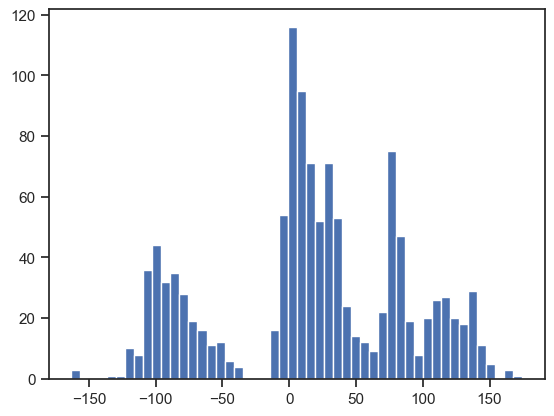

In [72]:
plt.hist(data['reclong'], 50)
plt.show()

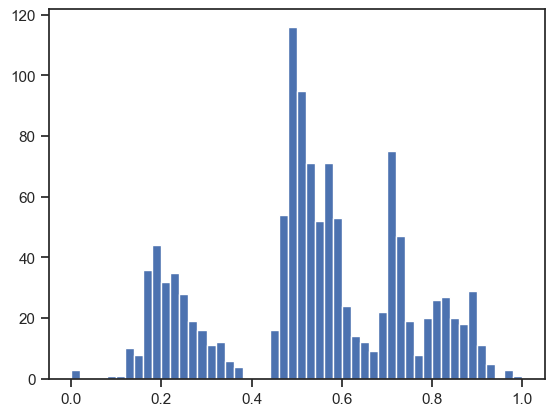

In [73]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [74]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['reclong']])

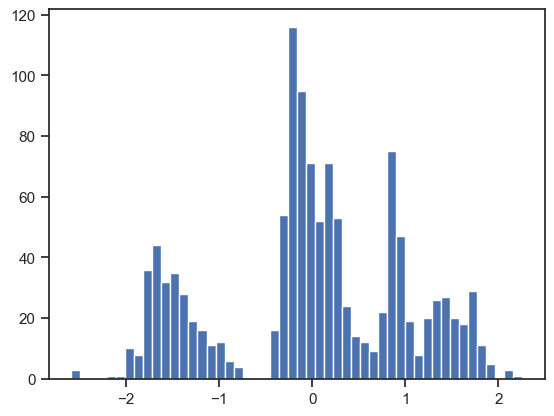

In [75]:
plt.hist(sc2_data, 50)
plt.show()